## Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing["RAD"].value_counts()

RAD
24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: count, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288900,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703894,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

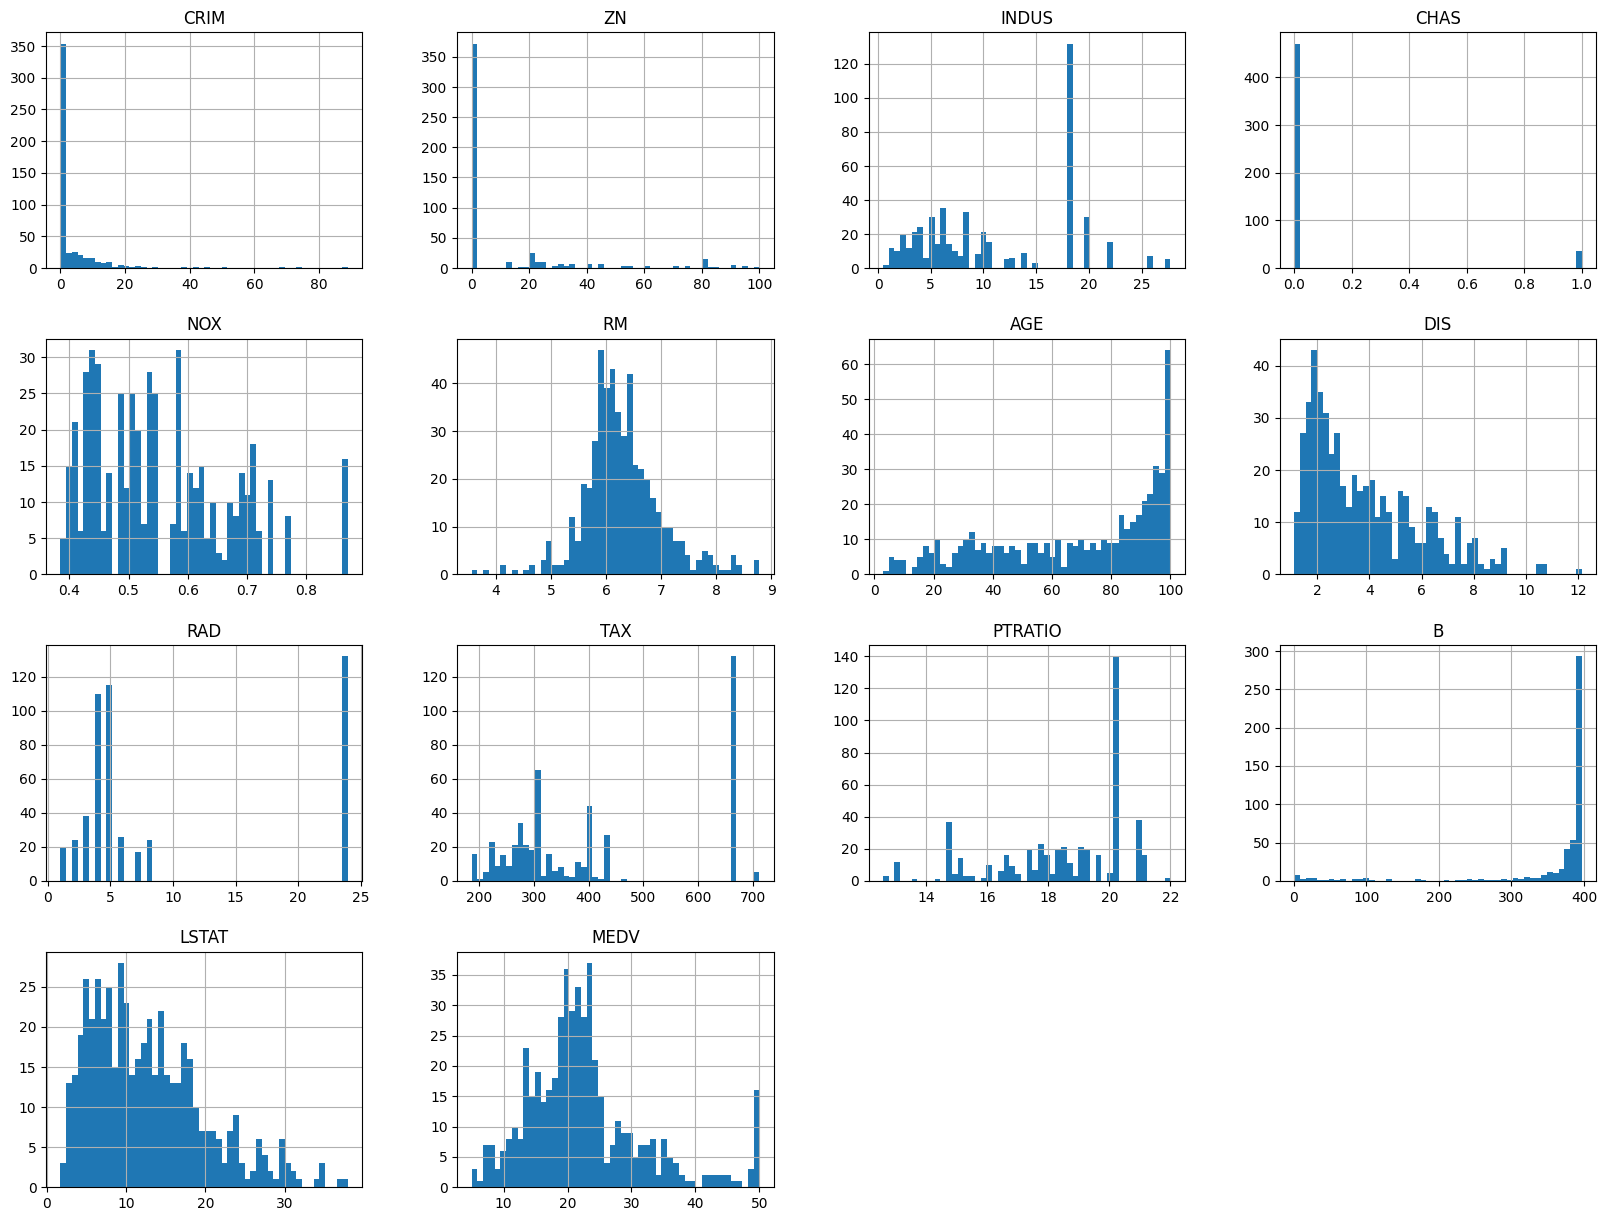

In [8]:
# Histogram Plot
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize = (20,15))

## Train-Test Splitting

##### For learning purpose. 
This might not distribute the class labels evenly between train and test dataset. 
There might be cases when the model is trained with only one label.

In [9]:
# import numpy as np
# def split_train_test(data, test_ratio):
#     np.random.seed(42)
#     shuffled = np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size = int(len(data)*test_ratio)
#     test_indices = shuffled[:test_set_size]
#     train_indices = shuffled[test_set_size:]
#     return data.iloc[train_indices], data.iloc[test_indices]

In [10]:
# train_set, test_set = split_train_test(housing, 0.2)

In [11]:
# print(f"Rows in training data set: {len(train_set)}\nRows in test data set: {len(test_set)}")

In [12]:
from sklearn.model_selection import train_test_split as tts
train_set, test_set = tts(housing, test_size = 0.2, random_state = 42)
print(f"Rows in training data set: {len(train_set)}\nRows in test data set: {len(test_set)}")

Rows in training data set: 404
Rows in test data set: 102


## Stratified Shuffle Split

To distribute class labels almost evenly between train and test dataset.

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(housing, housing['CHAS']):      # CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
strat_train_set['CHAS'].value_counts()

CHAS
0    376
1     28
Name: count, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

CHAS
0    95
1     7
Name: count, dtype: int64

In [16]:
376/28

13.428571428571429

In [17]:
95/7

13.571428571428571

Hence, we can see that the ratios of 0's and 1's in both the training and test data sets are almost equal when startified shuffle split is used.

In [18]:
housing = strat_train_set.copy()

In [19]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)   # MEDV: Median value of owner-occupied homes in $1000's

MEDV       1.000000
RM         0.679330
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

The median value of house (MEDV) is strongly positively correlated with average number of rooms per dwelling (RM).
The median value of house (MEDV) is positively correlated with proportion of residential land zoned for lots over 25,000 sq.ft. (ZN) and also 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town (B).
The median value of house (MEDV) is weakly positively correlated with weighted distances to five Boston employment centres (Dis) and Charles River dummy variable (CHAS).
The median value of house (MEDV) is strongly negatively correlated with % lower status of the population (LSTAT).

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

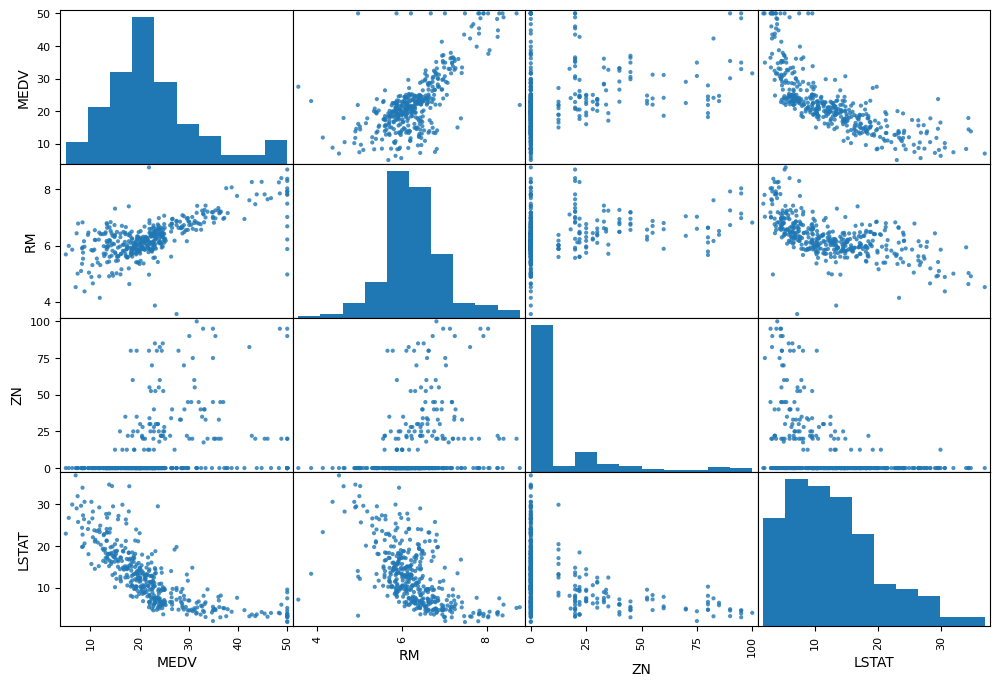

In [20]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(housing[attributes],figsize = (12,8), alpha = 0.8)

<Axes: xlabel='Average number of rooms per dwelling (RM)', ylabel="Median value of house price in $1000's (MEDV)">

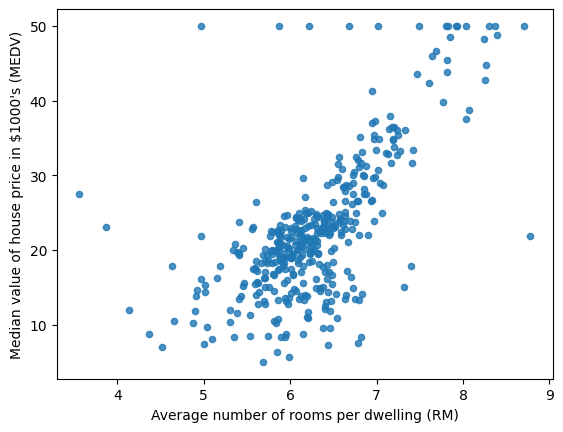

In [21]:
housing.plot(kind = 'scatter', x = 'RM', y = 'MEDV', alpha = 0.8, 
             xlabel = "Average number of rooms per dwelling (RM)",
            ylabel = "Median value of house price in $1000's (MEDV)")

## Trying out Attribute Combination

In [22]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [23]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679330
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.527377
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='Tax per room (TAXRM)', ylabel="Median value of house price in $1000's (MEDV)">

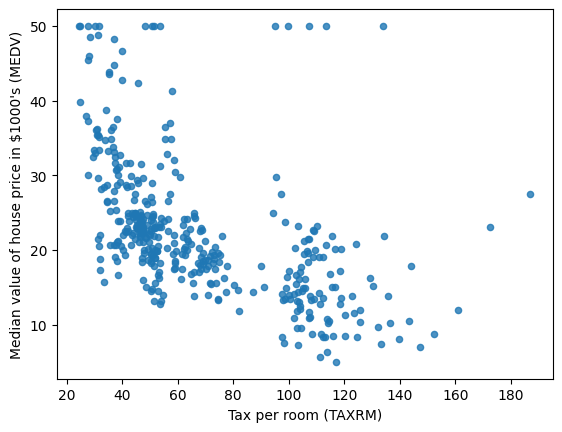

In [24]:
housing.plot(kind = 'scatter', x = 'TAXRM', y = 'MEDV', alpha = 0.8, 
             xlabel = "Tax per room (TAXRM)",
            ylabel = "Median value of house price in $1000's (MEDV)")

In [25]:
housing = strat_train_set.drop('MEDV', axis = 1)
housing_label = strat_train_set['MEDV'].copy()

## Missing Attributes

To take care of missing attributes, there are three options:
    1. Get rid of the missing data points.
    2. Get rid of the whole attribute.
    3. Set the missing data points to some value (0, mean or median).

In [26]:
# Option 1: Drop NA
a = housing.dropna(subset=['RM'])
a.shape

(399, 13)

In [27]:
# Note that the original housing data will remain unchanged.
housing.shape

(404, 13)

In [28]:
# Option 2: Drop the entire attribute
housing.drop('RM', axis=1).shape
# Note that The RM column has been removed and also the original housing dataframe will remain unchanged.

(404, 12)

In [29]:
# Option 3: Set the missing data point values as median
median_RM = housing['RM'].median()
housing['RM'].fillna(median_RM)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

#### Simple Imputer to add a specific value in place of missing data points in the training data set

SimpleImputer is a scikit-learn class which is helpful in handling the missing data in the predictive model dataset. It replaces the NaN values with a specified placeholder. 

In [30]:
# Importing the SimpleImputer class
from sklearn.impute import SimpleImputer
 
# Imputer object using the mean strategy 
imputer = SimpleImputer(strategy ='median')

# Fit the imputer in the housing data
imputer.fit(housing)

SimpleImputer(strategy='median')

In [31]:
# To see the median value of all the column attributes
imputer.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21600e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [32]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284349,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.710319,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Scikit-learn has primarily, three types of objects:

    1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. 
                    It has a fit method and transform method. 
                    Fit method - Fits the dataset and calculates internal parameters.

    2. Transformers - Transform method takes input and returns output based on the learnings from fit(). 
                      It also has a convenience function called fit_transform() which fits and then transforms.

    3. Predictors - LinearRegression model is an example of predictor. 
                    fit() and predict() are two common functions. 
                    It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, there are two types of feature scaling methods:
    
    1. Min-max scaling (Normalization): (value - min)/(max - min)
       Sklearn provides a class called MinMaxScaler for this.

    2. Standardization: (value - mean)/std
       Sklearn provides a class called StandardScaler for this.

## Creating a Pipeline

Pipeline allows us to sequentially apply a list of transformers to preprocess the data and, if desired, conclude the sequence with a final predictor for predictive modeling.

In [33]:
# Importing the Pipeline class and StandardScaler method
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
#   ....... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [34]:
housing_numpy_tr = my_pipeline.fit_transform(housing)
housing_numpy_tr.shape

(404, 13)

## Selecting a desired model

### Linear Regression Model

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(housing_numpy_tr, housing_label)

LinearRegression()

In [36]:
some_labels = housing_label.iloc[:5]
some_data = housing.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([23.90432852, 27.19179942, 20.62710784, 25.04574488, 23.76512874])

In [37]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

#### Evaluating the linear regression model

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions = model.predict(housing_numpy_tr)
lin_reg_mse = mean_squared_error(housing_label, housing_predictions)
lin_reg_rmse = np.sqrt(lin_reg_mse)

In [39]:
lin_reg_mse

23.310465626137216

In [40]:
lin_reg_rmse

4.828091302589173

The root mean squared error value obtained through linear regression model is not very good. So, we discard the model and try some other algorithm.

In [41]:
# Cross - Validation
from sklearn.model_selection import cross_val_score
scores_lr = cross_val_score(model, housing_numpy_tr, housing_label, scoring='neg_mean_squared_error', cv = 10)
rmse_scores_lr = np.sqrt(-scores_lr)

In [42]:
rmse_scores_lr

array([4.22568291, 4.26854332, 5.16299824, 3.84401994, 5.33981324,
       4.29588127, 7.45322148, 5.48376993, 4.14436106, 6.05591052])

In [43]:
def print_stats(scores):
   print(f"Scores: {scores}\nMean: {scores.mean()}\nStandard Deviation: {scores.std()}")

In [44]:
print_stats(rmse_scores_lr)

Scores: [4.22568291 4.26854332 5.16299824 3.84401994 5.33981324 4.29588127
 7.45322148 5.48376993 4.14436106 6.05591052]
Mean: 5.02742019125267
Standard Deviation: 1.058328194073003


### Decision Tree Regressor Model

In [45]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(housing_numpy_tr, housing_label)

DecisionTreeRegressor()

In [46]:
some_labels = housing_label.iloc[:5]
some_data = housing.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([21.9, 24.5, 16.7, 23.1, 23. ])

In [47]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

#### Evaluating the Decision Tree Regressor Model¶

In [48]:
housing_predictions = model.predict(housing_numpy_tr)
dec_tree_reg_mse = mean_squared_error(housing_label, housing_predictions)
dec_tree_reg_rmse = np.sqrt(dec_tree_reg_mse)

In [49]:
dec_tree_reg_rmse

0.0

The model has learned all the noises as well and has done overfitting.

#### Using a better evaluation technique - cross validation

In [50]:
from sklearn.model_selection import cross_val_score
scores_dc = cross_val_score(model, housing_numpy_tr, housing_label, scoring='neg_mean_squared_error', cv = 10)
rmse_scores_dc = np.sqrt(-scores_dc)

In [51]:
rmse_scores_dc

array([3.83179892, 5.42871768, 5.45759708, 3.66579443, 3.97775062,
       2.77096554, 5.37536045, 3.77064318, 3.32982732, 4.51043235])

In [52]:
def print_stats(scores):
   print(f"Scores: {scores}\nMean: {scores.mean()}\nStandard Deviation: {scores.std()}")

In [53]:
print_stats(rmse_scores_dc)

Scores: [3.83179892 5.42871768 5.45759708 3.66579443 3.97775062 2.77096554
 5.37536045 3.77064318 3.32982732 4.51043235]
Mean: 4.211888756063104
Standard Deviation: 0.8956424641688058


### Random Forest Regressor Model

In [54]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(housing_numpy_tr, housing_label)

RandomForestRegressor()

In [55]:
some_labels = housing_label.iloc[:5]
some_data = housing.iloc[:5]
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.525, 25.42 , 16.597, 23.299, 23.643])

In [56]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

#### Evaluating the Random Forest Regressor Model

In [57]:
housing_predictions = model.predict(housing_numpy_tr)
ran_for_reg_mse = mean_squared_error(housing_label, housing_predictions)
ran_for_reg_rmse = np.sqrt(ran_for_reg_mse)

In [58]:
ran_for_reg_mse

1.3640810445544524

In [59]:
ran_for_reg_rmse

1.1679388017162768

In [60]:
# Cross - validation
from sklearn.model_selection import cross_val_score
scores_rf = cross_val_score(model, housing_numpy_tr, housing_label, scoring='neg_mean_squared_error', cv = 10)
rmse_scores_rf = np.sqrt(-scores_rf)

In [61]:
rmse_scores_rf

array([2.75153093, 2.90820507, 4.3745215 , 2.52525544, 3.3929949 ,
       2.55115614, 4.6444051 , 3.39972284, 3.18303706, 3.15297364])

In [62]:
def print_stats(scores):
   print(f"Scores: {scores}\nMean: {scores.mean()}\nStandard Deviation: {scores.std()}")

In [63]:
print_stats(rmse_scores_rf)

Scores: [2.75153093 2.90820507 4.3745215  2.52525544 3.3929949  2.55115614
 4.6444051  3.39972284 3.18303706 3.15297364]
Mean: 3.2883802618126126
Standard Deviation: 0.6804321400829034


The rmse score for this model is better than the linear regression model and decision tree regression model. So, we go with random forest tree regression model.

## Saving the model

In [64]:
from joblib import dump, load
dump(model, 'Real_Estate.joblib')

['Real_Estate.joblib']

## Testing the model on test data

In [65]:
X_test = strat_test_set.drop('MEDV', axis=1)
y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
#print(f"{final_predictions}\n{list(y_test)}")

In [66]:
final_rmse

2.958574395039001

## Using the model

In [67]:
model = load('Real_Estate.joblib')
features = np.array([[-5.43942006, 4.12628155, -1.6165014, -0.67288841, -1.42262, -11.44443979304, -49.31238772, 7.61111401, -26.0016879 , -0.5778192 ,
-0.97491834, 0.41164221, -66.86091034]])
model.predict(features)

array([24.511])